<a href="https://colab.research.google.com/github/heejjj/Health_Bio_AI/blob/bio_colab/Medical_Cost_Personal_Datasets_group3_HJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Columns 

- age: age of primary beneficiary
  - 주요수혜자(의료서비스 고객)의 나이 
-sex: insurance contractor gender, female, male
  - 피보험자의 성별
- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
  - 체질량 지수, 신장을고려한 객관적 체질량(kg / m ^ 2)지수 
신장의 체중에대한 비율(최적수치는 18.5 to 24.9)
- children: Number of children covered by health insurance / Number of dependents
  - 보험 적용 되는 자녀와 피부양자 수

- smoker: Smoking
  - 흡연 여부
- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
  - 의료서비스 고객의 미주내 거주지 (northeast, southeast, southwest, northwest)
- charges: Individual medical costs billed by health insuranc
  - 의료보험사에서 청구한 개인의 의료비용(자기부담액)



- Inspiration 
  - 동기
- Can you accurately predict insurance costs?
  - 얼마나 정확하게 예측할 수 있는가?

<img src='https://seaborn.pydata.org/_images/function_overview_8_0.png'>

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
!ls -1ha /content/drive/MyDrive/kaggle.json

/content/drive/MyDrive/kaggle.json


In [22]:
!mkdir -p ~/.kaggle #Make Directory  / ~/.    /. -> 숨김폴더
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle #move
!chmod 600 ~/.kaggle/kaggle.json #chmod : 리눅스의 디렉토리 / 파일에 대한 권한 관리
# read(읽기,r):4 / write(쓰기,w):2 / exe(실행,x):1
# chmod 777 (read write,exe) rwx권한이 다 있는 것.
# ex) chmod 750 #readwrite exe read exe -rwxr-x----
!kaggle competitions list

ref                                                                                deadline             category             reward  teamCount  userHasEntered  
---------------------------------------------------------------------------------  -------------------  ---------------  ----------  ---------  --------------  
https://www.kaggle.com/competitions/vesuvius-challenge-ink-detection               2023-06-14 23:59:00  Featured         $1,000,000        141           False  
https://www.kaggle.com/competitions/asl-signs                                      2023-05-01 23:59:00  Research           $100,000        683           False  
https://www.kaggle.com/competitions/tlvmc-parkinsons-freezing-gait-prediction      2023-06-08 23:59:00  Research           $100,000        214           False  
https://www.kaggle.com/competitions/amp-parkinsons-disease-progression-prediction  2023-05-18 23:59:00  Featured            $60,000        785           False  
https://www.kaggle.com/competition

In [23]:
! kaggle datasets download -d mirichoi0218/insurance

insurance.zip: Skipping, found more recently modified local copy (use --force to force download)


In [24]:
# kaggle file unzip 

!unzip /content/insurance.zip

Archive:  /content/insurance.zip
replace insurance.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: insurance.csv           


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [107]:
data = pd.read_csv('insurance.csv')

In [108]:
df_data = pd.DataFrame(data)
df_data.head()

#그래프로 확인해야할 것 
#흡연을 하는지 안하는지 
#지역별로 금액에 차이가 있는지 
#bmi 별 차이
#sex 별 차이
#age별 차이 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
df_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
df_data.info()

#missing value는 없고
#data dtype이 다르므로 수치형 계산을 위해 obj는 데이터 타입 변경 필요(correlation, heatmap등 그리기 위해)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df_data.describe() #int type 데이터의 요약통계량

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.940209,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.594028,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,3.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,4.000000,63770.428010


In [ ]:
df_data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [109]:
#obj type int형으로 바꾸기 위해 df 복제(df_data2)
df_data2 = df_data
df_data2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [84]:
df_data3 = df_data

In [110]:
#object to int in df_data2

df_data2['sex'] = df_data.sex.replace({'female': 0, 'male': 1})
df_data2['smoker'] = df_data.smoker.replace({'no': 0, 'yes': 1})
df_data2.head()
#df_data2['region'] = df_data.region.replace({'southeast':0, 'southwest':1, 'northwest':3, 'northeast':4}) #또는 원핫인코딩으로 변경가능


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [78]:
df_data3['sex'] = df_data.sex.replace({'female': 0, 'male': 1})
df_data3['smoker'] = df_data.smoker.replace({'no': 0, 'yes': 1})

In [111]:
region_dummy =pd.get_dummies(df_data['region'])
region_dummy.head()

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [89]:
df_data2.drop('region',inplace=True, axis =1)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3,10600.54830
1334,18,0,31.920,0,0,4,2205.98080
1335,18,0,36.850,0,0,0,1629.83350
1336,21,0,25.800,0,0,1,2007.94500


In [90]:
df_data2.drop('region',inplace=True, axis =1)
df_data2

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830
1334,18,0,31.920,0,0,2205.98080
1335,18,0,36.850,0,0,1629.83350
1336,21,0,25.800,0,0,2007.94500


In [112]:
#df_data3 = df_data
df_data2 = pd.concat([df_data2, region_dummy], axis=1)
df_data2.head()

#pd.concat([df1,df2]. axis=1) #matching되는 key가 없는 경우 NA

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,0,0,0,1
1,18,1,33.770,1,0,southeast,1725.55230,0,0,1,0
2,28,1,33.000,3,0,southeast,4449.46200,0,0,1,0
3,33,1,22.705,0,0,northwest,21984.47061,0,1,0,0
4,32,1,28.880,0,0,northwest,3866.85520,0,1,0,0


In [113]:
df_data2.drop('region',inplace=True, axis =1)
df_data2.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


<Axes: >

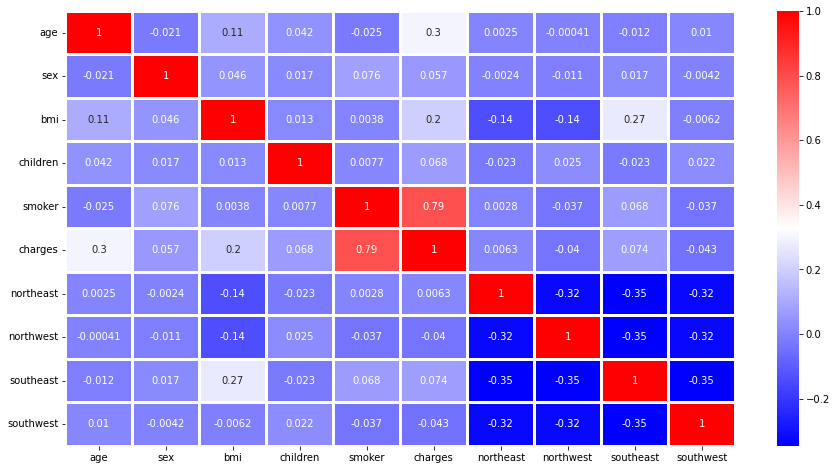

In [116]:

#fig, ax = plt.subplots(figsize=(8,7)) 
plt.figure(figsize=(15,8))
corr=df_data2.corr()
sns.heatmap(corr,annot=True,cmap='bwr',linewidths=1.1,linecolor='white')
#sns.heatmap(corr,annot=True,cmap='bwr',linecolor='white')

#지역은 별로 상관없음
#smoker
#children 약간? 

In [67]:
df_data2.describe() #int type 데이터의 요약통계량

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.940209,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.594028,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,3.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,4.000000,63770.428010


In [ ]:
data['age'].value_counts()

#18세 이상 성인

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

In [ ]:
#보험적용되는 자녀와 피부양자 수 
data['children'].value_counts()

#어린이 0~5살까지 
#6살~17살 까지는 ?? -> 18~64살(성인)의 피부양자 수 

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [43]:
#loc 인덱스 기준으로 행 데이터 출력
#iloc 행번호를 기준으로 행데이터 출력

df_data.loc[0] #컬럼값 출력

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
charges     16884.924
Name: 0, dtype: object

In [45]:
df_data.iloc[:] #열값 출력

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [47]:
df_data[['children','age']]

,children,age
0,0,19
1,1,18
2,3,28
3,0,33
4,0,32
...,...,...
1333,3,50
1334,0,18
1335,0,18
1336,0,21


In [48]:
df_data.loc[:, ['children', 'age']]

,children,age
0,0,19
1,1,18
2,3,28
3,0,33
4,0,32
...,...,...
1333,3,50
1334,0,18
1335,0,18
1336,0,21


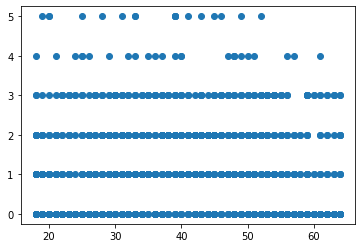

In [51]:
plt.scatter(data['age'],data['children'])

<Axes: xlabel='children', ylabel='charges'>

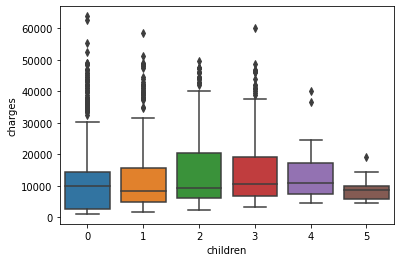

In [73]:
sns.boxplot(x=df_data['children'],y=df_data['charges'],data=df_data)

<Axes: xlabel='smoker', ylabel='charges'>

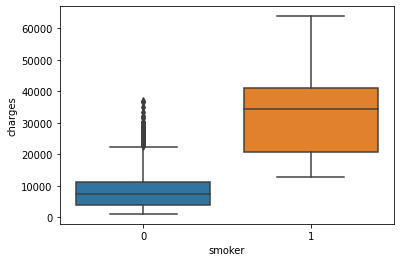

In [71]:
sns.boxplot(x=df_data['smoker'],y=df_data['charges'],data=df_data)

#smoker이면 보험료가 더 오름


In [ ]:
"""
matplotlib.pyplot.hist(x, 
                       bins=10, 
                       range=None, 
                       normed=False, 
                       weights=None, 
                       cumulative=False, 
                       bottom=None, 
                       histtype=u'bar', 
                       align=u'mid', 
                       orientation=u'vertical', 
                       rwidth=None, 
                       log=False, 
                       color=None, 
                       label=None, 
                       stacked=False, 
                       hold=None, 
                       **kwargs)"""

<Axes: >

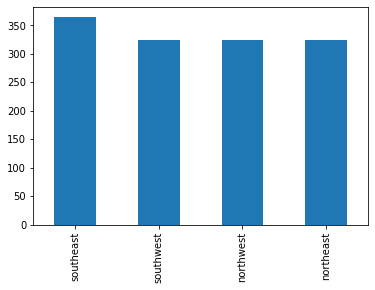

In [ ]:
data['region'].value_counts().plot(kind='bar') #지역별로 가입자수 변동은 크지 않음

<Axes: xlabel='charges', ylabel='Count'>

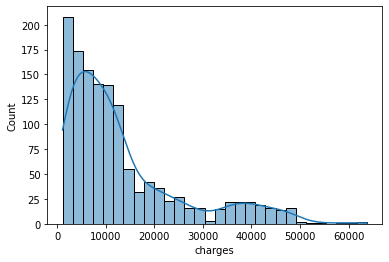

In [ ]:
sns.histplot(df_data2.charges, kde=True)

<Axes: ylabel='smoker'>

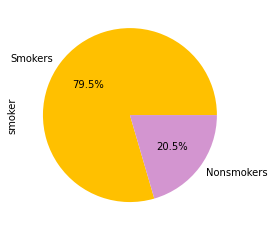

In [ ]:
colors = ['#ffc000', '#d395d0']
# #ff9999 파스텔 핑크
# #ffc000 샛노랑
# #8fd9b6 파스텔 그린
# #d395d0 파스텔 퍼플
labels = ['Smokers', 'Nonsmokers']

data['smoker'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors = colors, labels=labels)
#autopct='%.1f%%' 소숫점1자리 표기

#가입자수는 비흡연자가 월등히 높음
#흡연자, 비흡연자 금액차이 확인하기


#plt.pie(data, labels=label, autopct='%1.1f%%', explode=[0,0,0,0.1,0], shadow=True, startangle=90)

In [ ]:
np.corrcoef(data['bmi'],data['charges'])[0][1]

0.19834096883362895

In [ ]:
corr_matrix = df_data2.corr()

<Axes: >

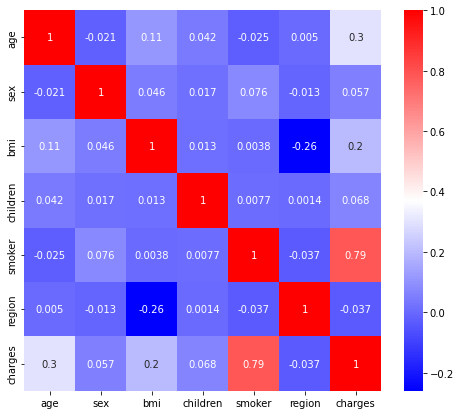

In [ ]:
fig, ax = plt.subplots(figsize=(8,7)) 
sns.heatmap(corr_matrix, annot=True, cmap='bwr') #cmap.  RdBu','YlOrRd'


#https://matplotlib.org/stable/tutorials/colors/colormaps.html

#age, bmi 

<ipython-input-184-4dd122793249>:10: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



"\nfig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)\ninsur_features = ['age','sex','bmi','children', 'smoker', 'region']\n\nfor i , feature in enumerate(insur_features):\n  row = int(i/4)\n  col = i%4\n  #seaborn의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현\n  sns.regplot(x=feature, y ='charges', data= df_data, ax = axs[row][col])"

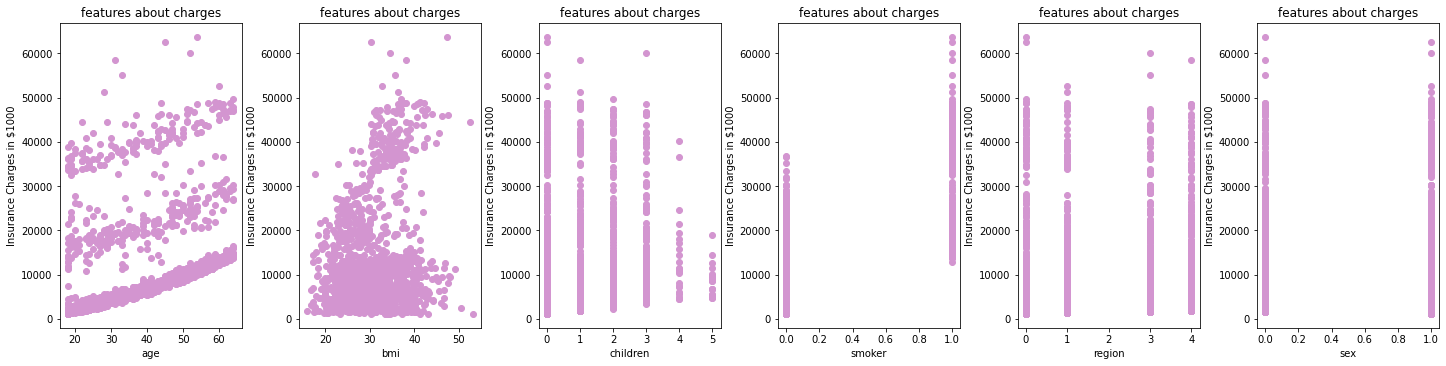

In [ ]:
features = ['age', 'bmi', 'children', 'smoker', 'region', 'sex']
target = df_data2['charges']

#plt.figure(figsize=(20,5))
#fig, axs = plt.subplots(ncols =2, nrows=3, figsize=(20,5))
fig, axs = plt.subplots(figsize=(20,5), ncols=3, nrows=2)


for i , col in enumerate(features):
  plt.subplot(1, len(features), i+1)  #1부터(왜 1부터?0은 label자리라서, matplot은 1부터 시작작) feature의 길이만큼 가는데, 
  x = df_data2[col]
  y = target
  plt.scatter(x,y, marker = 'o', color ='#d395d0')
  plt.title("features about charges")
  plt.xlabel(col)
  plt.ylabel('Insurance Charges in $1000')
  plt.tight_layout(pad=0.4, w_pad = 0.5, h_pad=5.0)



"""
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
insur_features = ['age','sex','bmi','children', 'smoker', 'region']

for i , feature in enumerate(insur_features):
  row = int(i/4)
  col = i%4
  #seaborn의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
  sns.regplot(x=feature, y ='charges', data= df_data, ax = axs[row][col])"""

<Axes: xlabel='charges', ylabel='Count'>

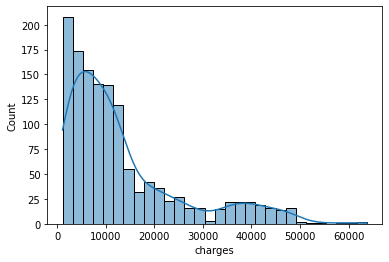

In [ ]:
sns.histplot(df_data2.charges, kde=True)

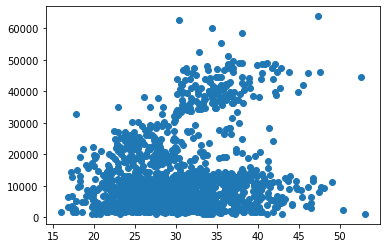

In [ ]:
plt.scatter(data['bmi'],data['charges'])

#bmi 체질량 지수 
"""BMI를 이용한 비만도 계산은 자신의 몸무게를 키의 제곱으로 나누는 것으로 공식은 kg/㎡. BMI가 18.5 이하면 저체중 ／ 
18.5 ~ 22.9 사이면 정상 ／ 23.0 ~ 24.9 사이면 과체중
 ／ 25.0 이상부터는 비만으로 판정."""#한국기준


In [ ]:
df_data['bmi'].value_counts()

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

In [ ]:
df_data['bmi'].dtype

dtype('float64')

In [56]:
#bmi 체질량 지수 
"""BMI를 이용한 비만도 계산은 자신의 몸무게를 키의 제곱으로 나누는 것으로 공식은 kg/㎡. BMI가 18.5 이하면 저체중 ／ 
18.5 ~ 22.9 사이면 정상 ／ 23.0 ~ 24.9 사이면 과체중
 ／ 25.0 이상부터는 비만으로 판정.""" #한국인 기준


#https://www.cdc.gov/ 미국기준 체질량 지수
"""BMI	Weight Status
Below 18.5	Underweight
18.5—24.9	Healthy Weight
25.0—29.9	Overweight
30.0 and Above	Obesity"""
#under weight:1, normal:2, over weight:3, obesity:4


def obesity (bmi):
  if int(bmi) <= 18.5:
    return 'Underweight'
  elif 18.5< int(bmi) <= 24.9:
    return 'Healthy Weight'
  elif 25.0 <= int(bmi) <= 29.9:
    return 'Overweight'
  elif int(bmi) >= 30:
    return 'Obesity'


In [ ]:
#정상과 비정상 나누기
def obesity (bmi):
  if int(bmi) <= 18.5:
    return '1'
  elif 18.5< int(bmi) <= 24.9:
    return '2'
  elif 25.0 <= int(bmi) <= 29.9:
    return '3'
  elif int(bmi) >= 30:
    return '4'


In [ ]:
df_data['bmi'].dtype

dtype('float64')

In [ ]:
df_data['bmi'].max()

53.13

In [ ]:
df_data['bmi_int'].max()

53

In [ ]:
df_data['bmi_int'].dtype

dtype('int64')

In [ ]:
df_data['bmi_int'] = df_data['bmi'].astype(int)
df_data.head()

,age,sex,bmi,children,smoker,region,charges,bmi_2,bmi_int
0,19,female,27.900,0,yes,southwest,16884.92400,4,27
1,18,male,33.770,1,no,southeast,1725.55230,4,33
2,28,male,33.000,3,no,southeast,4449.46200,4,33
3,33,male,22.705,0,no,northwest,21984.47061,2,22
4,32,male,28.880,0,no,northwest,3866.85520,4,28


In [ ]:
df_data['bmi'].value_counts(sort=True)

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

In [ ]:
df_data['bmi'].apply(obesity).value_counts()

normal          112
over weight     106
under weight     21
Name: bmi, dtype: int64

In [ ]:
df_data['bmi'].apply(obesity).value_counts() #한국인 기준

obesity         1093
normal           112
over weight      109
under weight      24
Name: bmi, dtype: int64

In [ ]:
df_data['bmi'].apply(obesity).value_counts() #미국인 기준(0)

Obesity           707
Overweight        386
Healthy Weight    221
Underweight        24
Name: bmi, dtype: int64

In [59]:
df_data['weight'] = df_data['bmi'].apply(obesity)
df_data.head()

SyntaxError: ignored

In [ ]:
#wieght별 그래프 



In [52]:
import matplotlib.pyplot as plt
import seaborn as standardSclaer

#변수의 분포를 시각화하거나, 여러 변수들 사이의 상관관계를 여러개의 그래프로 쪼개서 표현할때
#FeactGrid 는 Colum, row, hue를 통한 의미구분을 통해 총 3차원까지 구현이 가능함. 
#aspect : subplot의 세로 대비 가로의 비율

facet = sns.FacetGrid(df_data, hue='', aspect=4)
facet.map(sns.kdeplot, 'Age', shade = True) #kde: 이차원 밀집도 그래프 
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
sns.axes_style('dark')

#20-30대에 사망률> 생존률이 높다 왜 그럴까? 
#0 사망률 


KeyError: ignored

In [ ]:
df_data['bmi_2'] = df_data['bmi'].apply(obesity)
df_data

,age,sex,bmi,children,smoker,region,charges,bmi_2
0,19,female,27.900,0,yes,southwest,16884.92400,None
1,18,male,33.770,1,no,southeast,1725.55230,None
2,28,male,33.000,3,no,southeast,4449.46200,None
3,33,male,22.705,0,no,northwest,21984.47061,normal
4,32,male,28.880,0,no,northwest,3866.85520,None
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,None
1334,18,female,31.920,0,no,northeast,2205.98080,None
1335,18,female,36.850,0,no,southeast,1629.83350,None
1336,21,female,25.800,0,no,southwest,2007.94500,None


In [ ]:
df_data['bmi_2'] = df_data['bmi'].apply(obesity)
df_data

,age,sex,bmi,children,smoker,region,charges,bmi_2
0,19,female,27.900,0,yes,southwest,16884.92400,4
1,18,male,33.770,1,no,southeast,1725.55230,4
2,28,male,33.000,3,no,southeast,4449.46200,4
3,33,male,22.705,0,no,northwest,21984.47061,2
4,32,male,28.880,0,no,northwest,3866.85520,4
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,4
1334,18,female,31.920,0,no,northeast,2205.98080,4
1335,18,female,36.850,0,no,southeast,1629.83350,4
1336,21,female,25.800,0,no,southwest,2007.94500,4


In [ ]:
import plotly.express as px
fig = px.scatter_matrix(df_data, dimensions=["age", "sex", "bmi", "smoker"], color="region")
fig.show()

In [ ]:
import plotly.express as px
data = dict(
    number=[39, 27.4, 20.6, 11, 2],
    stage=["Website visit", "Downloads", "Potential customers", "Requested price", "Invoice sent"])
fig = px.funnel(data, x='number', y='stage')
fig.show()

In [ ]:
import plotly.express as px
fig = px.scatter(df_data, 
                 x='bmi', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
df.loc[df['bmi'].lt(18.5), 'oms'] = "slim"
df.loc[df['bmi'].ge(18.5) & df['IMC'].lt(25), 'oms'] = "normal"
df.loc[df['bmi'].ge(25) & df['IMC'].lt(30), 'oms'] = "overweight"
df.loc[df['bmi'].ge(30), 'oms'] = "obese"

ValueError: ignored

In [ ]:
corr_matrix = data.corr()

<Axes: >

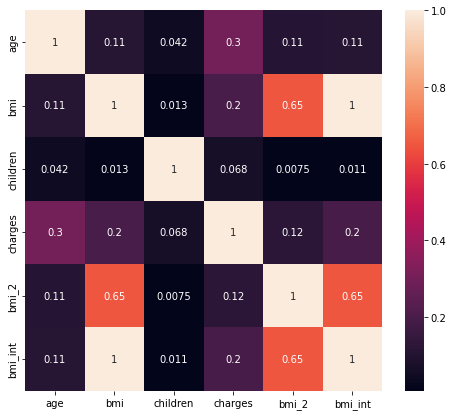

In [ ]:
fig, ax = plt.subplots(figsize=(8,7)) 
sns.heatmap(corr_matrix, annot=True) #cmap

#age, bmi 

In [ ]:
df_data['bmi'].apply.obesity

df.loc['Sum'] = df.apply(np.sum, axis = 0)

AttributeError: ignored

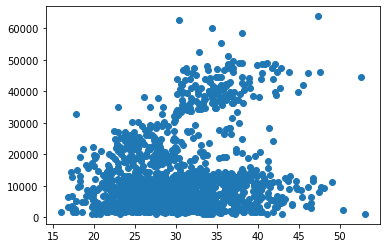

In [ ]:
plt.scatter(data['bmi'],data['charges'])


In [ ]:
#피부양자가 없는 사람들 가입자수가 많음
#아이들을 가지고 있는 가정의 보험비용이 더 늘어나는지? 



In [ ]:
#age별 보험
#남녀별 보험
#흡연비흡연자별 보험
#지역별 보험차이

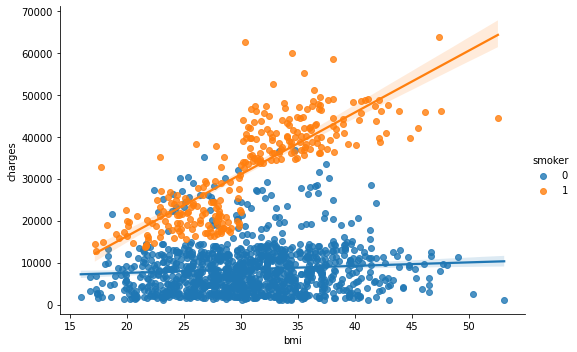

In [125]:
sns.lmplot(x='bmi',y='charges',hue='smoker',data=data,aspect=1.5,height=5)

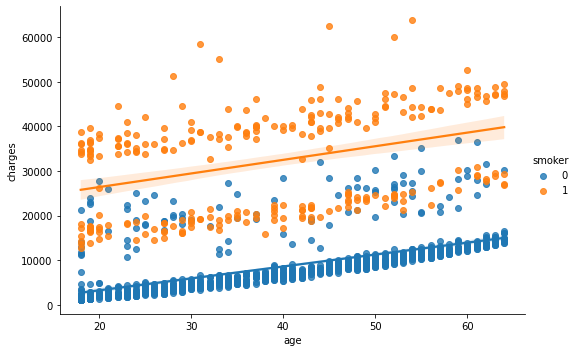

In [127]:
sns.lmplot(x='age',y='charges',hue='smoker',data=data,aspect=1.5,height=5)

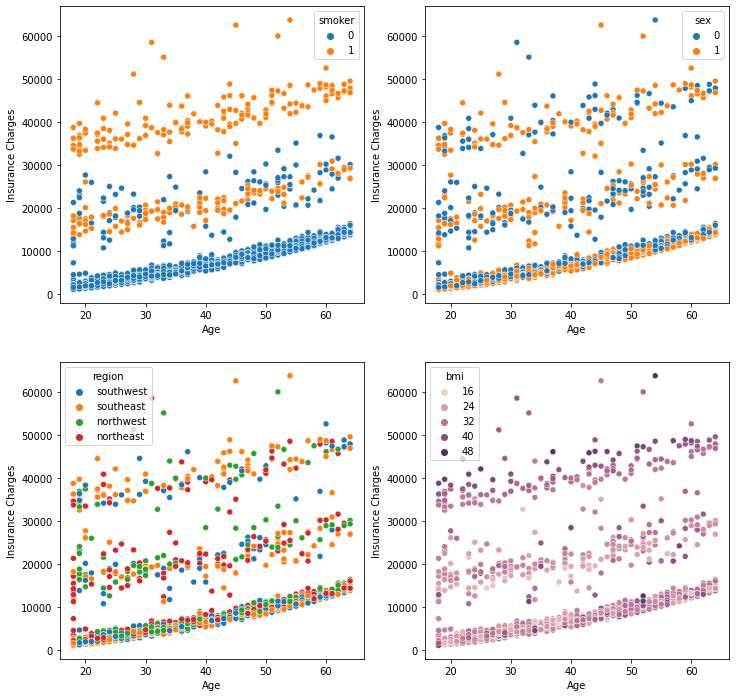

In [126]:
fig,axes = plt.subplots(2,2, figsize=(12,12))
hues=['smoker','sex','region','bmi']
for hue,ax in zip(hues,axes.flat):
    sns.scatterplot(df_data,x='age',y='charges',hue=hue, ax=ax)
    ax.set_xlabel("Age")
    ax.set_ylabel("Insurance Charges")
plt.show()

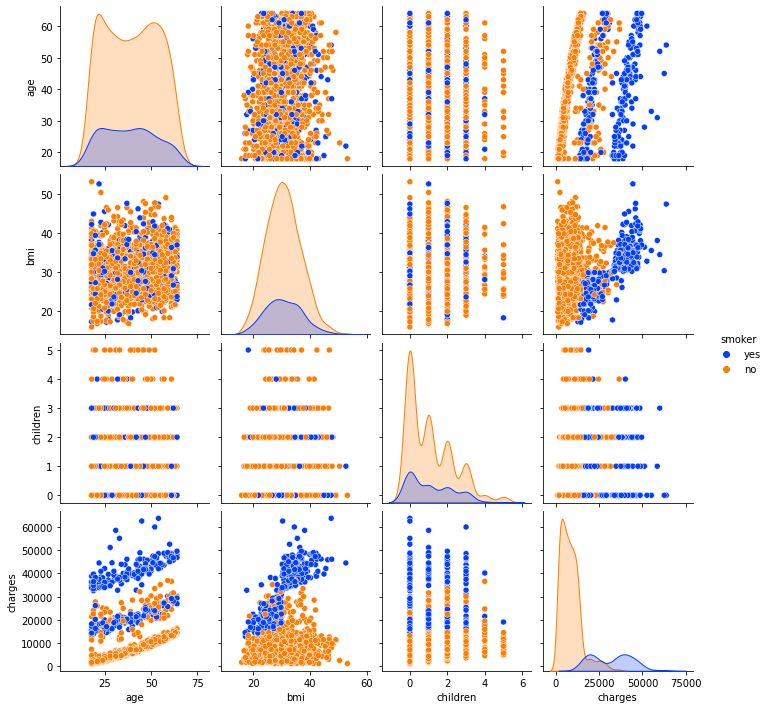

In [ ]:
#feature 별 그래프 
sns.pairplot(data,
             diag_kind='kde',
             hue="smoker", 
             palette='bright') # pastel, bright, deep, muted, colorblind, dark


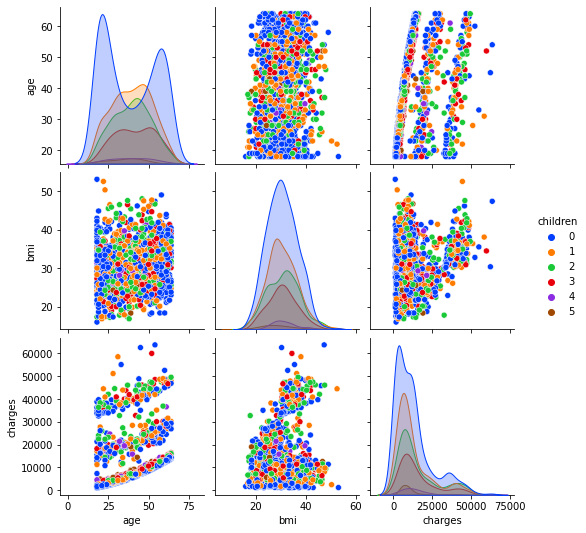

In [ ]:
sns.pairplot(data,
             diag_kind='kde',
             hue="children", 
             palette='bright') 

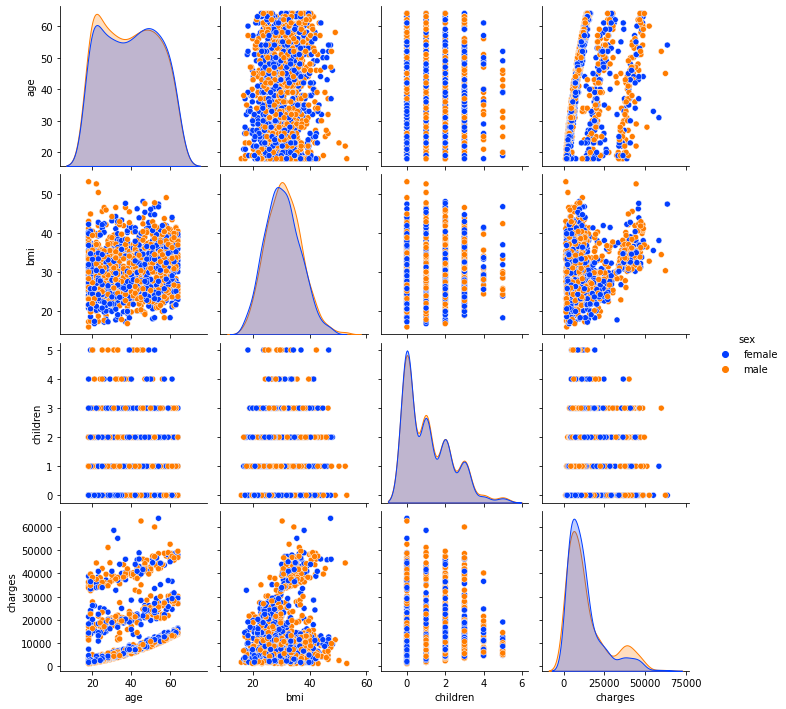

In [ ]:
sns.pairplot(data,
             diag_kind='kde',
             hue="sex", 
             palette='bright') 

In [ ]:
#test train 비율 - 통상적인 비율 체택 시간적 여유가 된다면 비율에 따른 모델의 성능으로 재조정 가능할 듯 

In [ ]:
data_1.drop(columns = 'charges',axis = 1)


KeyError: ignored

### Split data

In [117]:
#y = pd.Series( data_1['charges']) 

X = df_data2.drop('charges', axis =1 )
y = df_data2['charges']

In [119]:
X.head()

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,0,0,0,1
1,18,1,33.770,1,0,0,0,1,0
2,28,1,33.000,3,0,0,0,1,0
3,33,1,22.705,0,0,0,1,0,0
4,32,1,28.880,0,0,0,1,0,0


In [120]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [121]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.2,
                                                 random_state = 42)

In [122]:
X_train.shape, y_train.shape

((1070, 9), (1070,))

In [123]:
from sklearn.linear_model import LinearRegression

In [128]:
linear_regression_model =LinearRegression()
linear_regression_model.fit(X_train,y_train)

LinearRegression()

In [131]:
pred_linear=linear_regression_model.predict(X_test)

In [130]:
#accuracy
linear_regression_model.score(X_test, y_test)

0.7835929767120723

In [133]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [134]:
print("MSE", mean_squared_error(y_test, pred_linear))
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred_linear)))
print("MAE:", mean_absolute_error(y_test, pred_linear))
print("R2 Score:",r2_score(y_test, pred_linear))

MSE 33596915.85136146
RMSE: 5796.2846592762735
MAE: 4181.194473753643
R2 Score: 0.7835929767120723
